# Artificial Intelligence Nanodegree
## Deep Learning
# P0 Step 1: Analyzing IMDB Data in Keras

[Keras: The Python Deep Learning library](https://keras.io/)

In [1]:
%%html
<style>
@import url('https://fonts.googleapis.com/css?family=Lobster|Aladin');
body {background-color: oldlace;}
a {color: firebrick; font-family: Aladin;}
h1, h2 {color: #ff603b; font-family: Lobster; text-shadow: 4px 4px 4px #aaa;}
h3, h4 {color: firebrick; font-family: Lobster; text-shadow: 4px 4px 4px #aaa;}
span {text-shadow: 4px 4px 4px #ccc;}
div.output_prompt, div.output_area pre {color: slategray;}
div.input_prompt, div.output_subarea {color: firebrick;}      
div.output_stderr pre {background-color: oldlace;}  
div.output_stderr {background-color: slategrey;}         
</style>
<script>
code_show = true; 
function code_display() {
    if (code_show) {
        $('div.input').each(function(id) {
            if (id == 0 || $(this).html().indexOf('hide_code') > -1) {$(this).hide();}
        });
        $('div.output_prompt').css('opacity', 0);
    } else {
        $('div.input').each(function(id) {$(this).show();});
        $('div.output_prompt').css('opacity', 1);
    };
    code_show = !code_show;
} 
$(document).ready(code_display);
</script>
<form action="javascript: code_display()">
<input style="color: #ff603b; background: oldlace; opacity: 0.8;" \ 
type="submit" value="Click to display or hide code cells">
</form>

In [57]:
hide_code = ''
# Imports
import numpy as np
import keras

from keras.datasets import imdb

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.layers import Flatten, LSTM

from keras.preprocessing.text import Tokenizer

from keras.callbacks import ModelCheckpoint

import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

## 1. Loading the data
This dataset comes preloaded with Keras, so one simple command will get us training and testing data. There is a parameter for how many words we want to look at. We've set it at 1000, but feel free to experiment.

In [3]:
hide_code
# Loading the data (it's preloaded in Keras)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=1000)

print(x_train.shape)
print(x_test.shape)

(25000,)
(25000,)


## 2. Examining the data
Notice that the data has been already pre-processed, where all the words have numbers, and the reviews come in as a vector with the words that the review contains. For example, if the word 'the' is the first one in our dictionary, and a review contains the word 'the', then there is a 1 in the corresponding vector.

The output comes as a vector of 1's and 0's, where 1 is a positive sentiment for the review, and 0 is negative.

In [4]:
hide_code
print(x_train[0])
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
1


## 3. One-hot encoding the output
Here, we'll turn the input vectors into (0,1)-vectors. For example, if the pre-processed vector contains the number 14, then in the processed vector, the 14th entry will be 1.

In [5]:
hide_code
# One-hot encoding the output into vector mode, each of length 1000
tokenizer = Tokenizer(num_words=1000)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print(x_train[0])

[ 0.  1.  1.  0.  1.  1.  1.  1.  1.  1.  0.  0.  1.  1.  1.  1.  1.  1.
  1.  1.  0.  1.  1.  0.  0.  1.  1.  0.  1.  0.  1.  0.  1.  1.  0.  1.
  1.  0.  1.  1.  0.  0.  0.  1.  0.  0.  1.  0.  1.  0.  1.  1.  1.  0.
  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  1.  0.
  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  1.  1.  0.  1.  1.
  0.  0.  0.  0.  1.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  1.  0.  0.
  1.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

And we'll also one-hot encode the output.

In [6]:
hide_code
# One-hot encoding the output
num_classes = 2
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)
print(y_test.shape)

(25000, 2)
(25000, 2)


Let's divide the test set into two auxiliary ones.

In [7]:
hide_code
x_valid = x_test[:10000]
x_test = x_test[10000:]
y_valid = y_test[:10000]
y_test = y_test[10000:]

## 4. Building the  model architecture
Build a model here using sequential. Feel free to experiment with different layers and sizes! Also, experiment adding dropout to reduce overfitting.
### MLP

In [21]:
hide_code
# TODO: Build the model architecture
# TODO: Compile the model using a loss function and an optimizer.
def mlp_model():
    model = Sequential()
    
    model.add(Dense(512, activation='relu', input_shape=(1000,)))
    model.add(Dropout(0.7))
    
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.7))
    
    model.add(Dense(2, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [22]:
hide_code
mlp_model = mlp_model()
mlp_checkpointer = ModelCheckpoint(filepath='weights.best.mlp.hdf5', 
                                   verbose=2, save_best_only=True)

### CNN

In [76]:
hide_code
def cnn_model():
    model = Sequential()

    model.add(Conv1D(32, 3, padding='same', input_shape=(1000, 1)))
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Flatten())
    
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(2))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])    
    return model

In [77]:
hide_code
cnn_model = cnn_model()
cnn_checkpointer = ModelCheckpoint(filepath='weights.best.cnn.hdf5', 
                                   verbose=2, save_best_only=True)

### RNN

In [33]:
hide_code
def rnn_model():
    model = Sequential()
    
    model.add(LSTM(512, return_sequences=True, input_shape=(1, 1000)))
    model.add(LSTM(128, return_sequences=False))    
        
    model.add(Dense(2))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])    
    return model

In [34]:
hide_code
rnn_model = rnn_model()
rnn_checkpointer = ModelCheckpoint(filepath='weights.best.rnn.hdf5', 
                                   verbose=2, save_best_only=True)

## 5. Training the model
Run the model here. Experiment with different batch_size, and number of epochs!
### MLP

In [23]:
hide_code
# TODO: Run the model. Feel free to experiment with different batch sizes and number of epochs.
mlp_history = mlp_model.fit(x_train, y_train,
                            validation_data=(x_valid, y_valid),
                            callbacks=[mlp_checkpointer],
                            epochs=5, batch_size=64, verbose=2)

Train on 25000 samples, validate on 10000 samples
Epoch 1/5
Epoch 00000: val_loss improved from inf to 0.32485, saving model to weights.best.mlp.hdf5
29s - loss: 0.4601 - acc: 0.7801 - val_loss: 0.3248 - val_acc: 0.8653
Epoch 2/5
Epoch 00001: val_loss improved from 0.32485 to 0.32042, saving model to weights.best.mlp.hdf5
21s - loss: 0.3489 - acc: 0.8489 - val_loss: 0.3204 - val_acc: 0.8638
Epoch 3/5
Epoch 00002: val_loss improved from 0.32042 to 0.31223, saving model to weights.best.mlp.hdf5
17s - loss: 0.3149 - acc: 0.8634 - val_loss: 0.3122 - val_acc: 0.8661
Epoch 4/5
Epoch 00003: val_loss did not improve
15s - loss: 0.2885 - acc: 0.8783 - val_loss: 0.3128 - val_acc: 0.8664
Epoch 5/5
Epoch 00004: val_loss did not improve
15s - loss: 0.2659 - acc: 0.8901 - val_loss: 0.3147 - val_acc: 0.8678


### CNN

In [78]:
hide_code
cnn_history = cnn_model.fit(x_train.reshape(-1, 1000, 1), y_train, 
                            epochs=5, batch_size=128, verbose=2, 
                            callbacks=[cnn_checkpointer],
                            validation_data=(x_valid.reshape(-1, 1000, 1), y_valid))

Train on 25000 samples, validate on 10000 samples
Epoch 1/5
Epoch 00000: val_loss improved from inf to 0.35073, saving model to weights.best.cnn.hdf5
100s - loss: 0.4292 - acc: 0.7985 - val_loss: 0.3507 - val_acc: 0.8434
Epoch 2/5
Epoch 00001: val_loss improved from 0.35073 to 0.34071, saving model to weights.best.cnn.hdf5
100s - loss: 0.3545 - acc: 0.8454 - val_loss: 0.3407 - val_acc: 0.8484
Epoch 3/5
Epoch 00002: val_loss improved from 0.34071 to 0.33856, saving model to weights.best.cnn.hdf5
111s - loss: 0.3289 - acc: 0.8591 - val_loss: 0.3386 - val_acc: 0.8532
Epoch 4/5
Epoch 00003: val_loss improved from 0.33856 to 0.33614, saving model to weights.best.cnn.hdf5
92s - loss: 0.3084 - acc: 0.8666 - val_loss: 0.3361 - val_acc: 0.8520
Epoch 5/5
Epoch 00004: val_loss did not improve
97s - loss: 0.2820 - acc: 0.8826 - val_loss: 0.3399 - val_acc: 0.8547


### RNN

In [35]:
hide_code
rnn_history = rnn_model.fit(x_train.reshape(-1, 1, 1000), y_train, 
                            epochs=3, batch_size=128, verbose=2, 
                            callbacks=[rnn_checkpointer],
                            validation_data=(x_valid.reshape(-1, 1, 1000), y_valid))

Train on 25000 samples, validate on 10000 samples
Epoch 1/3
Epoch 00000: val_loss improved from inf to 0.31155, saving model to weights.best.rnn.hdf5
53s - loss: 0.3756 - acc: 0.8336 - val_loss: 0.3116 - val_acc: 0.8658
Epoch 2/3
Epoch 00001: val_loss did not improve
46s - loss: 0.2998 - acc: 0.8713 - val_loss: 0.3142 - val_acc: 0.8650
Epoch 3/3
Epoch 00002: val_loss did not improve
47s - loss: 0.2715 - acc: 0.8820 - val_loss: 0.3179 - val_acc: 0.8633


## 6. Evaluating the model
This will give you the accuracy of the model, as evaluated on the testing set. Can you get something over 85%?

In [24]:
hide_code
mlp_model.load_weights('weights.best.mlp.hdf5')
mlp_score = mlp_model.evaluate(x_test, y_test, verbose=0)
print("MLP Model Accuracy: ", mlp_score[1])

MLP Model Accuracy:  0.859599999968


In [79]:
hide_code
cnn_model.load_weights('weights.best.cnn.hdf5')
cnn_score = cnn_model.evaluate(x_test.reshape(-1, 1000, 1), y_test, verbose=0)
print("CNN Model Accuracy: ", cnn_score[1])

CNN Model Accuracy:  0.845


In [37]:
hide_code
rnn_model.load_weights('weights.best.rnn.hdf5')
rnn_score = rnn_model.evaluate(x_test.reshape(-1, 1, 1000), y_test, verbose=0)
print("RNN Model Accuracy: ", rnn_score[1])

RNN Model Accuracy:  0.858133333302


## 7. Displaying the training history

In [26]:
hide_code
def loss_plot(fit_history):
    plt.figure(figsize=(18, 4))

    plt.plot(fit_history.history['loss'], color = 'slategray', label = 'train')
    plt.plot(fit_history.history['val_loss'], color = '#ff603b', label = 'valid')

    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Function');

MLP History


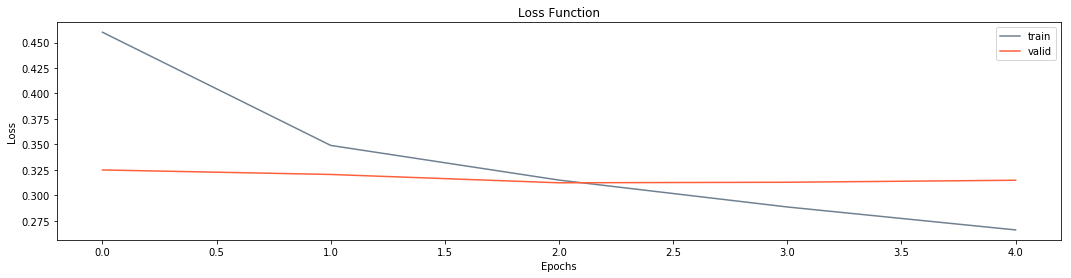

In [27]:
hide_code
print("MLP History")
loss_plot(mlp_history)

CNN History


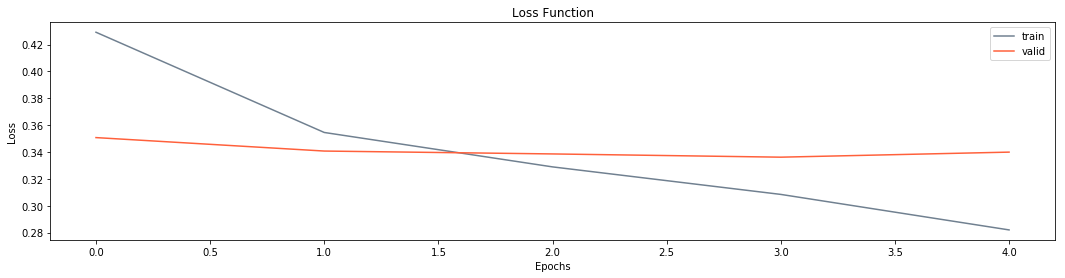

In [80]:
hide_code
print("CNN History")
loss_plot(cnn_history)

RNN History


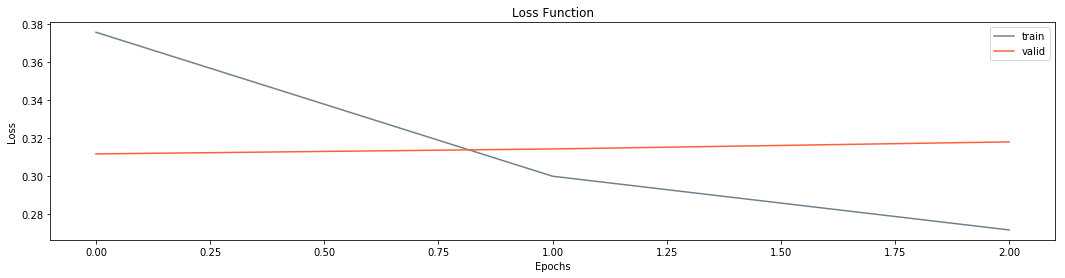

In [38]:
hide_code
print("RNN History")
loss_plot(rnn_history)

## MLP, CNN > 85%, CNN > 84%